# 성능 체크
-> Kaggle내 코드를 그대로 따라했을 때의 -> 이후 이거 기준 성장  
https://www.kaggle.com/amneves/quick-draw-keras-cnn-model

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import categorical_accuracy, top_k_categorical_accuracy, categorical_crossentropy

import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import keras.backend as K 
from keras.callbacks import EarlyStopping,ModelCheckpoint

from keras.utils import np_utils
from keras.models import Sequential
from keras.models import load_model

from keras.layers import BatchNormalization, Conv1D, LSTM, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.models import Model

from keras.callbacks import ReduceLROnPlateau
from keras.applications.mobilenet import MobileNet, decode_predictions
from keras.applications.resnet50 import ResNet50, decode_predictions

from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix, classification_report

import ast
import os
import cv2
from collections import Counter

Using TensorFlow backend.


# ==============================

In [2]:
path_dir = "E:/경희대학교/2019_2/데이터분석캡스톤디자인/quick_draw/quickdraw-doodle-recognition/top10/"
file_lst = os.listdir(path_dir)

## 10개 파일 중 50,000개씩의 데이터 사용

In [19]:
# all_data = pd.DataFrame()
# for i in file_lst:
#     print(i)
#     tmp = pd.read_csv(path_dir + i)
#     tmp = tmp[tmp["recognized"] == True]
#     ttmp = tmp.iloc[:50000]
#     all_data = pd.concat([all_data,ttmp],axis = 0)

airplane.csv
bear.csv
butterfly.csv
cat.csv
circle.csv
cloud.csv
dog.csv
door.csv
mouse.csv
star.csv


In [5]:
all_data =pd.read_csv("./true_split_data_1224/dataset_1.csv")

In [6]:
all_data.head()

,countrycode,drawing,key_id,recognized,timestamp,word
0,US,"[[[63, 59, 53, 33, 29, 39, 65, 73, 72, 66], [3...",5219658900701184,True,2017-01-27 12:47:13.868000,wine bottle
1,US,"[[[45, 44, 18, 7, 0, 13, 36, 58, 77, 102, 106,...",5344588942278656,True,2017-03-19 19:39:31.420990,wine bottle
2,CA,"[[[105, 80, 73, 73, 77, 94, 102], [32, 29, 33,...",4617064918548480,True,2017-03-05 22:50:38.920360,wine bottle
3,JP,"[[[4, 0, 5, 12, 41, 50, 55, 59, 105, 110, 111,...",6571431754203136,True,2017-03-29 14:30:51.318940,wine bottle
4,US,"[[[75, 72, 85, 96, 98, 95, 78, 74], [7, 40, 42...",5325999203942400,True,2017-01-27 16:17:31.971340,wine bottle


In [7]:
all_data['drawing'] = all_data['drawing'].apply(ast.literal_eval)

# ================================

* ast로 계속 바꿔주지 않으려고 pickle 방식 활용

In [2]:
all_data = pd.read_pickle("new_true_split_data/dataset_1.pkl")

In [3]:
all_data.shape

(500000, 6)

In [4]:
word_lst = list(all_data['word'].unique())

In [5]:
train2, test = train_test_split(all_data, test_size=0.3, shuffle = True,
                                random_state = 42,
                                stratify = all_data["word"])

In [6]:
train2.head()

,countrycode,drawing,key_id,recognized,timestamp,word
4424,US,"[[[11, 16, 3, 0, 16, 30, 75, 87, 95, 96, 93, 8...",5282628892622848,True,2017-01-26 03:08:31.823640,wine bottle
84138,GB,"[[[74, 67, 53, 27, 10, 2, 0, 6, 37, 56, 161, 2...",6094540798689280,True,2017-03-25 07:23:34.504550,pond
390002,US,"[[[29, 81, 143, 179, 186, 182, 105, 90, 48, 25...",6721971112902656,True,2017-03-02 14:02:55.861420,cake
129896,US,"[[[30, 64, 145, 159, 166, 166, 175, 176, 166, ...",5082382782693376,True,2017-03-01 16:15:52.619470,traffic light
336032,CA,"[[[141, 160, 166, 167, 164, 158, 38, 13, 6, 7,...",5870901683814400,True,2017-03-19 09:47:37.955320,sea turtle


In [7]:
Counter(train2["word"])

Counter({'wine bottle': 17500,
         'pond': 17500,
         'cake': 17500,
         'traffic light': 17500,
         'sea turtle': 17500,
         'carrot': 17500,
         'microphone': 17500,
         'snake': 17500,
         'octopus': 17500,
         'mermaid': 17500,
         'chandelier': 17500,
         'dog': 17500,
         'bat': 17500,
         'television': 17500,
         'light bulb': 17500,
         'computer': 17500,
         'pliers': 17500,
         'candle': 17500,
         'monkey': 17500,
         'couch': 17500})

In [8]:
train, valid=  train_test_split(train2, test_size=0.3, shuffle = True, 
                                random_state = 42,
                                stratify = train2["word"])

In [9]:
Counter(all_data["word"])

Counter({'wine bottle': 25000,
         'candle': 25000,
         'computer': 25000,
         'pond': 25000,
         'light bulb': 25000,
         'traffic light': 25000,
         'bat': 25000,
         'carrot': 25000,
         'snake': 25000,
         'dog': 25000,
         'monkey': 25000,
         'television': 25000,
         'microphone': 25000,
         'sea turtle': 25000,
         'couch': 25000,
         'cake': 25000,
         'mermaid': 25000,
         'chandelier': 25000,
         'octopus': 25000,
         'pliers': 25000})

In [10]:
print(train.shape)
print(valid.shape)
print(test.shape)

(245000, 6)
(105000, 6)
(150000, 6)


In [11]:
word_le = LabelEncoder()
word_le.fit(all_data['word'])

LabelEncoder()

In [12]:
word_le.classes_

array(['bat', 'cake', 'candle', 'carrot', 'chandelier', 'computer',
       'couch', 'dog', 'light bulb', 'mermaid', 'microphone', 'monkey',
       'octopus', 'pliers', 'pond', 'sea turtle', 'snake', 'television',
       'traffic light', 'wine bottle'], dtype=object)

### Split

In [13]:
size = 64
word_num = len(word_lst)
BASE_SIZE = 256

#### cv2.line
* img: 선분이 그려질 이미지  
* (x1,y1) 선분의 시작점
* (x2,y2) 선분의 끝점
* color: 색상(0~255)
* thickness

In [14]:
def reshape_draw(rs, size=256, lw=6):
    img = np.zeros((BASE_SIZE, BASE_SIZE), np.uint8)
    for s in rs:
        for i in range(len(s[0]) - 1):
            _ = cv2.line(img, (s[0][i], s[1][i]), (s[0][i + 1], s[1][i + 1]), 255, lw)
#             print(_)

    if size != BASE_SIZE:
        return cv2.resize(img, (size, size))
    else:
        return img

In [15]:
def drawing_make_array(df, size = size, lw = 6):
    x = np.zeros((len(df),size,size))
    for i, rs in enumerate(df.drawing.values):
        x[i] = reshape_draw(rs,size=size,lw=lw)
    x = x/255 # 정규화
    x = x.reshape((len(df),size,size,1)).astype(np.float32)
    return x

In [15]:
train_X = drawing_make_array(train, size)
train_y = to_categorical(word_le.transform(train['word'].values))

NameError: name 'drawing_make_array' is not defined

In [21]:
valid_X = drawing_make_array(valid, size)
valid_y = to_categorical(word_le.transform(valid['word'].values))

KeyboardInterrupt: 

In [16]:
test_X = drawing_make_array(test, size)
test_y = to_categorical(word_le.transform(test['word'].values))

In [23]:
train_X.shape

NameError: name 'train_X' is not defined

## Model

In [17]:
STEPS= 200
batch = 100
epochs = 50

In [21]:
datagen = ImageDataGenerator()

In [22]:
K.clear_session()
base_model = ResNet50(include_top=False, input_shape=(size, size, 1), weights=None, classes=word_num)

C:\Users\julia\Desktop\tf\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [23]:
x = base_model.output
x = Flatten()(x)
x = Dense(64, activation = 'relu')(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
predictions = Dense(word_num, activation='softmax')(x)

In [24]:
# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

In [25]:
model.compile(optimizer=Adam(lr=1e-4), loss='categorical_crossentropy',
              metrics=[categorical_accuracy])


In [26]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 70, 70, 1)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 32, 32, 64)   3200        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 32, 32, 64)   256         conv1[0][0]                      
____________________________________________________________________________________________

In [27]:
check_point = ModelCheckpoint('1224_resnet_1.h5', monitor='val_loss', mode='min', save_best_only=True)
reduceRP = ReduceLROnPlateau(monitor='val_categorical_accuracy', 
                             factor=0.75, patience=5,
                            mode = 'max',
                            min_delta = 0.005,
                            cooldown=3,
                            verbose = 1)

early = EarlyStopping(monitor="val_categorical_accuracy", 
                      mode="max", 
                      patience=10)

callbacks = [check_point, early,reduceRP]

In [28]:
hist = model.fit_generator(
    datagen.flow(train_X,train_y,batch_size = batch),
    steps_per_epoch = STEPS,
    validation_steps=STEPS, epochs=epochs, verbose=1,
    validation_data=(valid_X, valid_y),
    callbacks = callbacks
)

Epoch 1/50
200/200 [==============================] - 324s 2s/step - loss: 2.8534 - categorical_accuracy: 0.0981 - val_loss: 2.7745 - val_categorical_accuracy: 0.1154
Epoch 2/50
200/200 [==============================] - 327s 2s/step - loss: 2.7428 - categorical_accuracy: 0.1297 - val_loss: 2.5864 - val_categorical_accuracy: 0.1955
Epoch 3/50
200/200 [==============================] - 334s 2s/step - loss: 2.6410 - categorical_accuracy: 0.1693 - val_loss: 2.5235 - val_categorical_accuracy: 0.2375
Epoch 4/50
200/200 [==============================] - 337s 2s/step - loss: 2.5761 - categorical_accuracy: 0.1877 - val_loss: 2.3937 - val_categorical_accuracy: 0.2567
Epoch 5/50
200/200 [==============================] - 339s 2s/step - loss: 2.5175 - categorical_accuracy: 0.2021 - val_loss: 2.3546 - val_categorical_accuracy: 0.2806
Epoch 6/50
200/200 [==============================] - 342s 2s/step - loss: 2.4765 - categorical_accuracy: 0.2183 - val_loss: 2.2851 - val_categorical_accuracy: 0.315

Epoch 50/50
200/200 [==============================] - 338s 2s/step - loss: 0.5202 - categorical_accuracy: 0.8459 - val_loss: 0.3772 - val_categorical_accuracy: 0.9102


In [31]:
hist2 = model.fit_generator(
    datagen.flow(train_X,train_y,batch_size = batch),
    steps_per_epoch = STEPS,
    validation_steps=STEPS, epochs=10, verbose=1,
    validation_data=(valid_X, valid_y),
    callbacks = callbacks
)

Epoch 1/10
200/200 [==============================] - 315s 2s/step - loss: 0.5029 - categorical_accuracy: 0.8518 - val_loss: 0.3803 - val_categorical_accuracy: 0.9097
Epoch 2/10
200/200 [==============================] - 336s 2s/step - loss: 0.5017 - categorical_accuracy: 0.8547 - val_loss: 0.3535 - val_categorical_accuracy: 0.9170
Epoch 3/10
200/200 [==============================] - 336s 2s/step - loss: 0.4874 - categorical_accuracy: 0.8601 - val_loss: 0.3488 - val_categorical_accuracy: 0.9171
Epoch 4/10
200/200 [==============================] - 338s 2s/step - loss: 0.4834 - categorical_accuracy: 0.8660 - val_loss: 0.3409 - val_categorical_accuracy: 0.9161
Epoch 5/10
200/200 [==============================] - 337s 2s/step - loss: 0.4879 - categorical_accuracy: 0.8613 - val_loss: 0.3572 - val_categorical_accuracy: 0.9127
Epoch 6/10
200/200 [==============================] - 333s 2s/step - loss: 0.4840 - categorical_accuracy: 0.8648 - val_loss: 0.3231 - val_categorical_accuracy: 0.919

In [34]:
model.compile(optimizer=Adam(lr=7.499999810534064e-05), loss='categorical_crossentropy',
              metrics=[categorical_accuracy])

In [35]:
check_point = ModelCheckpoint('1224_resnet_3.h5', monitor='val_loss', mode='min', save_best_only=True)
reduceRP = ReduceLROnPlateau(monitor='val_categorical_accuracy', 
                             factor=0.75, patience=5,
                            mode = 'max',
                            min_delta = 0.005,
                            cooldown=3,
                            verbose = 1)

early = EarlyStopping(monitor="val_categorical_accuracy", 
                      mode="max", 
                      patience=10)

callbacks = [check_point, early,reduceRP]

In [36]:
hist3 = model.fit_generator(
    datagen.flow(train_X,train_y,batch_size = batch),
    steps_per_epoch = STEPS,
    validation_steps=STEPS, epochs=10, verbose=1,
    validation_data=(valid_X, valid_y),
    callbacks = callbacks
)

Epoch 1/10
200/200 [==============================] - 344s 2s/step - loss: 0.3680 - categorical_accuracy: 0.8970 - val_loss: 0.2988 - val_categorical_accuracy: 0.9288
Epoch 2/10
200/200 [==============================] - 343s 2s/step - loss: 0.3550 - categorical_accuracy: 0.8989 - val_loss: 0.2879 - val_categorical_accuracy: 0.9321
Epoch 3/10
200/200 [==============================] - 340s 2s/step - loss: 0.3442 - categorical_accuracy: 0.9019 - val_loss: 0.2974 - val_categorical_accuracy: 0.9298
Epoch 4/10
200/200 [==============================] - 341s 2s/step - loss: 0.3505 - categorical_accuracy: 0.9006 - val_loss: 0.3279 - val_categorical_accuracy: 0.9256
Epoch 5/10
200/200 [==============================] - 340s 2s/step - loss: 0.3476 - categorical_accuracy: 0.9036 - val_loss: 0.2839 - val_categorical_accuracy: 0.9324
Epoch 6/10
200/200 [==============================] - 338s 2s/step - loss: 0.3352 - categorical_accuracy: 0.9078 - val_loss: 0.3017 - val_categorical_accuracy: 0.928

In [27]:
import winsound as ws

def beepsound():
    freq = 2000    # range : 37 ~ 32767
    dur = 1000     # ms
    ws.Beep(freq, dur) # winsound.Beep(frequency, duration)


In [28]:
print(beepsound())

None


In [40]:
hist.history.keys()

dict_keys(['val_loss', 'val_categorical_crossentropy', 'val_categorical_accuracy', 'loss', 'categorical_crossentropy', 'categorical_accuracy', 'lr'])

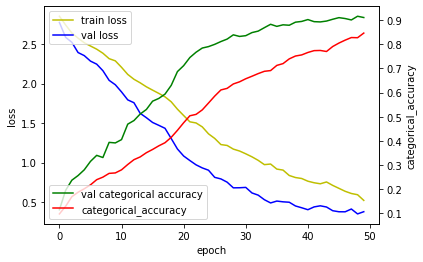

In [37]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'b', label='val loss')

acc_ax.plot(hist.history['val_categorical_accuracy'], 'g', label='val categorical accuracy')
acc_ax.plot(hist.history['categorical_accuracy'], 'r', label='categorical_accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('categorical_accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

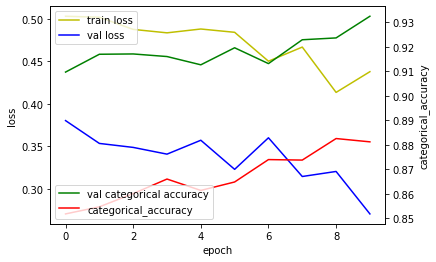

In [38]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist2.history['loss'], 'y', label='train loss')
loss_ax.plot(hist2.history['val_loss'], 'b', label='val loss')

acc_ax.plot(hist2.history['val_categorical_accuracy'], 'g', label='val categorical accuracy')
acc_ax.plot(hist2.history['categorical_accuracy'], 'r', label='categorical_accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('categorical_accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

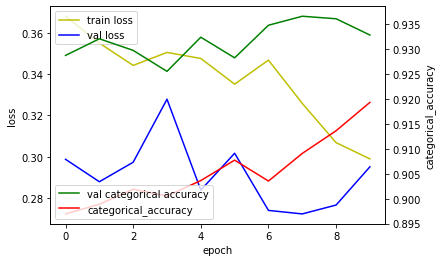

In [39]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist3.history['loss'], 'y', label='train loss')
loss_ax.plot(hist3.history['val_loss'], 'b', label='val loss')

acc_ax.plot(hist3.history['val_categorical_accuracy'], 'g', label='val categorical accuracy')
acc_ax.plot(hist3.history['categorical_accuracy'], 'r', label='categorical_accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('categorical_accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [40]:
all_hist = dict()
all_hist['loss'] = hist.history['loss'] + hist2.history['loss'] + hist3.history['loss']
all_hist['val_loss'] = hist.history['val_loss'] + hist2.history['val_loss'] + hist3.history['val_loss']
all_hist['val_categorical_accuracy'] = hist.history['val_categorical_accuracy'] + hist2.history['val_categorical_accuracy'] + hist3.history['val_categorical_accuracy']
all_hist['categorical_accuracy'] = hist.history['categorical_accuracy'] + hist2.history['categorical_accuracy'] + hist3.history['categorical_accuracy']

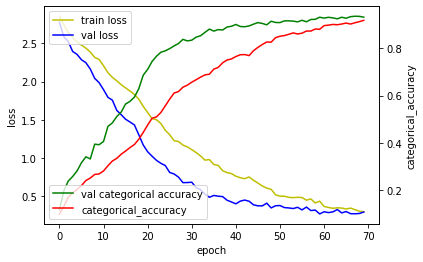

In [41]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(all_hist['loss'], 'y', label='train loss')
loss_ax.plot(all_hist['val_loss'], 'b', label='val loss')

acc_ax.plot(all_hist['val_categorical_accuracy'], 'g', label='val categorical accuracy')
acc_ax.plot(all_hist['categorical_accuracy'], 'r', label='categorical_accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('categorical_accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

## Evaluation

In [24]:
model_1 = load_model('1224_resnet/1224_resnet_1.h5')

In [25]:
model_1.evaluate(test_X, test_y)

150000/150000 [==============================] - 334s 2ms/step


[0.3512315213127931, 0.915993332862854]

In [28]:
pred_y1 = model_1.predict(test_X, batch_size= batch)

In [29]:
ppp1 = np.argmax(pred_y1,1)

In [30]:
ttt = np.argmax(test_y,1)

In [31]:
ppp1

array([3, 5, 7, ..., 1, 5, 0], dtype=int64)

In [32]:
ttt

array([3, 5, 7, ..., 1, 5, 0], dtype=int64)

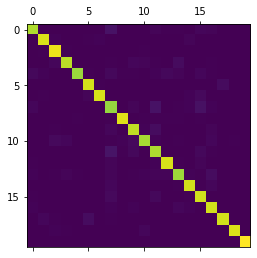

In [33]:
plt.matshow(confusion_matrix(ttt,ppp1))

In [34]:
print(classification_report(ttt, ppp1, 
                            target_names = [x for x in word_le.classes_]))

               precision    recall  f1-score   support

          bat       0.92      0.88      0.90      7500
         cake       0.95      0.94      0.94      7500
       candle       0.92      0.97      0.94      7500
       carrot       0.95      0.90      0.92      7500
   chandelier       0.97      0.85      0.91      7500
     computer       0.93      0.94      0.93      7500
        couch       0.97      0.94      0.96      7500
          dog       0.77      0.84      0.80      7500
   light bulb       0.96      0.95      0.95      7500
      mermaid       0.89      0.91      0.90      7500
   microphone       0.92      0.87      0.90      7500
       monkey       0.82      0.88      0.85      7500
      octopus       0.94      0.94      0.94      7500
       pliers       0.88      0.85      0.87      7500
         pond       0.92      0.93      0.93      7500
   sea turtle       0.84      0.93      0.88      7500
        snake       0.87      0.93      0.90      7500
   televi

In [35]:
model_2 = load_model('1224_resnet/1224_resnet_2.h5')

In [36]:
model_2.evaluate(test_X, test_y)

150000/150000 [==============================] - 367s 2ms/step


[0.2764353184341391, 0.9316133260726929]

In [37]:
pred_y2 = model_2.predict(test_X, batch_size= batch)

In [38]:
ppp2 = np.argmax(pred_y2,1)

In [39]:
ttt = np.argmax(test_y,1)

In [40]:
ppp2

array([3, 5, 7, ..., 1, 5, 0], dtype=int64)

In [41]:
ttt

array([3, 5, 7, ..., 1, 5, 0], dtype=int64)

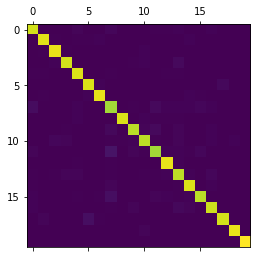

In [42]:
plt.matshow(confusion_matrix(ttt,ppp2))

In [43]:
print(classification_report(ttt, ppp2, 
                            target_names = [x for x in word_le.classes_]))

               precision    recall  f1-score   support

          bat       0.90      0.93      0.92      7500
         cake       0.96      0.95      0.96      7500
       candle       0.95      0.97      0.96      7500
       carrot       0.95      0.93      0.94      7500
   chandelier       0.91      0.95      0.93      7500
     computer       0.94      0.94      0.94      7500
        couch       0.96      0.96      0.96      7500
          dog       0.82      0.86      0.84      7500
   light bulb       0.97      0.94      0.96      7500
      mermaid       0.94      0.90      0.92      7500
   microphone       0.93      0.90      0.91      7500
       monkey       0.89      0.86      0.88      7500
      octopus       0.93      0.97      0.95      7500
       pliers       0.86      0.90      0.88      7500
         pond       0.92      0.94      0.93      7500
   sea turtle       0.93      0.90      0.92      7500
        snake       0.92      0.92      0.92      7500
   televi

In [19]:
model_3 = load_model('1224_resnet/1224_resnet_3.h5')

In [20]:
model_3.evaluate(test_X, test_y)

150000/150000 [==============================] - 354s 2ms/step


[0.27880830716793115, 0.9357466697692871]

In [20]:
pred_y3 = model_3.predict(test_X, batch_size= batch)

In [21]:
ppp3 = np.argmax(pred_y3,1)

In [22]:
ttt = np.argmax(test_y,1)

In [23]:
ppp3

array([3, 5, 7, ..., 1, 5, 0], dtype=int64)

In [24]:
ttt

array([3, 5, 7, ..., 1, 5, 0], dtype=int64)

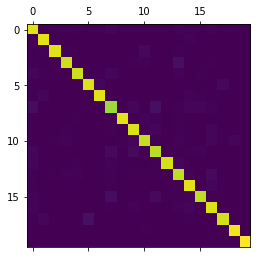

In [25]:
plt.matshow(confusion_matrix(ttt,ppp3))

In [26]:
print(classification_report(ttt, ppp3, 
                            target_names = [x for x in word_le.classes_]))

               precision    recall  f1-score   support

          bat       0.89      0.95      0.92      7500
         cake       0.95      0.96      0.95      7500
       candle       0.97      0.95      0.96      7500
       carrot       0.96      0.93      0.94      7500
   chandelier       0.95      0.92      0.94      7500
     computer       0.94      0.95      0.95      7500
        couch       0.97      0.96      0.96      7500
          dog       0.86      0.85      0.86      7500
   light bulb       0.97      0.95      0.96      7500
      mermaid       0.91      0.94      0.92      7500
   microphone       0.93      0.91      0.92      7500
       monkey       0.88      0.90      0.89      7500
      octopus       0.97      0.93      0.95      7500
       pliers       0.87      0.90      0.89      7500
         pond       0.91      0.96      0.93      7500
   sea turtle       0.95      0.90      0.92      7500
        snake       0.91      0.95      0.93      7500
   televi

In [ ]:
model.evaluate(test_X, test_y) #loss, categorical_entropy, categorical_accuracy

In [ ]:
pred_y = model.predict(test_X, batch_size= batch)

In [ ]:
ppp = np.argmax(pred_y,1)

In [ ]:
ttt = np.argmax(test_y,1)

In [ ]:
ppp

In [ ]:
ttt

In [ ]:
plt.matshow(confusion_matrix(ttt,ppp))

In [ ]:
print(classification_report(ttt, ppp, 
                            target_names = [x for x in word_le.classes_]))

* 이미지 그리기

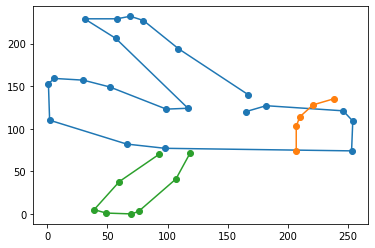

In [122]:
raw_images = list(all_data['drawing'])

k = 0
for i in range(len(raw_images[k])):
    plt.plot(raw_images[k][i][0], raw_images[k][i][1],'o-')
plt.show()

In [171]:
def get_Xy(in_df):
    X = np.stack(in_df['drawing'], 0)
    y = to_categorical(word_encoder.transform(in_df['word'].values))
    return X, y
train_X, train_y = get_Xy(train_df)
valid_X, valid_y = get_Xy(valid_df)
test_X, test_y = get_Xy(test_df)
print(train_X.shape)

NameError: name 'train_df' is not defined

In [108]:

stroke_read_model = Sequential()
stroke_read_model.add(BatchNormalization(input_shape = (None,)))
# filter count and length are taken from the script https://github.com/tensorflow/models/blob/master/tutorials/rnn/quickdraw/train_model.py
stroke_read_model.add(Conv1D(48, (5,)))
stroke_read_model.add(Dropout(0.3))
stroke_read_model.add(Conv1D(64, (5,)))
stroke_read_model.add(Dropout(0.3))
stroke_read_model.add(Conv1D(96, (3,)))
stroke_read_model.add(Dropout(0.3))
stroke_read_model.add(LSTM(128, return_sequences = True))
stroke_read_model.add(Dropout(0.3))
stroke_read_model.add(LSTM(128, return_sequences = False))
stroke_read_model.add(Dropout(0.3))
stroke_read_model.add(Dense(512))
stroke_read_model.add(Dropout(0.3))
stroke_read_model.add(Dense(len(word_encoder.classes_), activation = 'softmax'))
stroke_read_model.compile(optimizer = 'adam', 
                          loss = 'categorical_crossentropy', 
                          metrics = ['categorical_accuracy', top_3_accuracy])
stroke_read_model.summary()

ValueError: Axis -1 of input tensor should have a defined dimension but the layer received an input with shape (None, None).